1)

a)

In [1]:
import pymc as pm
import arviz as az
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('./date_alegeri_turul2.csv')

#X = df[['Varsta', 'Sex', 'Educatie', 'Venit']]

x_1 = df['Varsta']
x_2 = df['Sex']
x_3 = df['Educatie']
x_4 = df['Venit']
y_1 = df['Vot']


In [2]:
def standardize_data(X):
    return (X - np.mean(X)) / np.std(X)

x_1_standard = standardize_data(x_1)
x_2_standard = standardize_data(x_2)
x_3_standard = standardize_data(x_3)
x_4_standard = standardize_data(x_4)


In [7]:
with pm.Model() as model_a:
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta1 = pm.Normal('beta1', mu=0, sigma=10)
    beta2 = pm.Normal('beta2', mu=0, sigma=10)
    beta3 = pm.Normal('beta3', mu=0, sigma=10)
    beta4 = pm.Normal('beta4', mu=0, sigma=10)

    eps = pm.HalfNormal('eps', sigma=10)
    mu = pm.Deterministic('mu', alpha + beta1 * x_1_standard + beta2 * x_2_standard + beta3 * x_3_standard + beta4 *  x_4_standard)
    y_pred = pm.StudentT('y_pred', mu=mu, sigma=eps, nu=20, observed=y_1)

    trace_a = pm.sample(1000, tune=500, return_inferencedata=True)


Output()

Output()

b)

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha  0.811  0.017   0.783    0.846        0.0      0.0    3088.0    1580.0   
beta1  0.040  0.016   0.009    0.069        0.0      0.0    1922.0    1668.0   
beta2 -0.057  0.016  -0.091   -0.031        0.0      0.0    2928.0    1307.0   
beta3  0.069  0.016   0.041    0.104        0.0      0.0    2655.0    1570.0   
beta4  0.133  0.016   0.098    0.160        0.0      0.0    2426.0    1847.0   

       r_hat  
alpha    1.0  
beta1    1.0  
beta2    1.0  
beta3    1.0  
beta4    1.0  


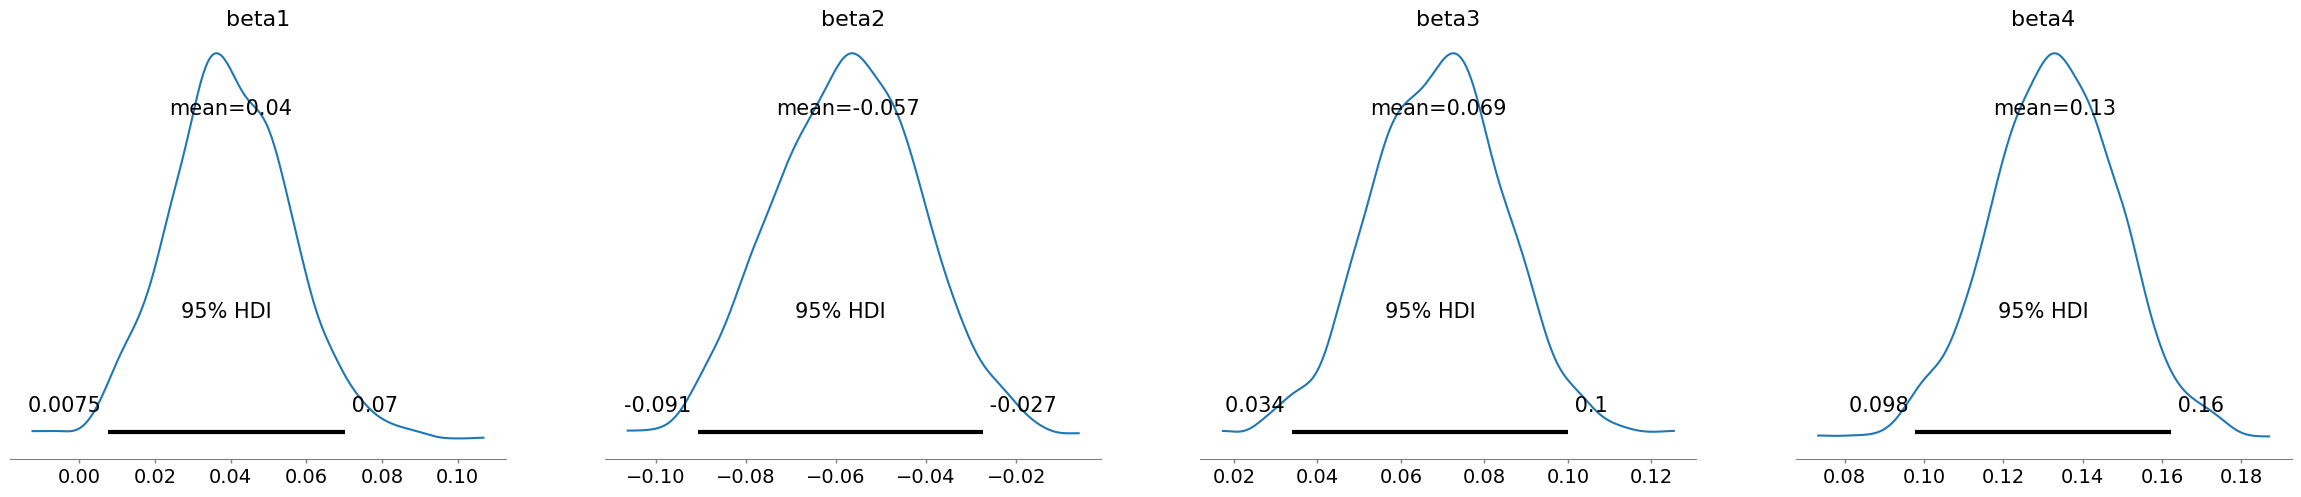

In [8]:
summary = az.summary(trace_a, var_names=['alpha', 'beta1', 'beta2', 'beta3', 'beta4'])
print(summary)
az.plot_posterior(trace_a, var_names=['beta1', 'beta2', 'beta3', 'beta4'], hdi_prob=0.95)
plt.show()

##  variabilele care influenteaza cel mai mult rezultatul sunt:  sexul si nivelul de educatie
##  (adica cele cu val cea mai mare la beta mean)

c)

In [14]:
with pm.Model() as model_c:
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta2 = pm.Normal('beta2', mu=0, sigma=10)
    beta3 = pm.Normal('beta3', mu=0, sigma=10)

    eps = pm.HalfNormal('eps', sigma=10)
    mu = pm.Deterministic('mu', alpha + beta2 * x_2_standard + beta3 * x_3_standard)

    bd = pm.Deterministic('bd', -alpha/beta3 - beta2/beta3 * x_2_standard)

    y_pred = pm.StudentT('y_pred', mu=mu, sigma=eps, nu=20, observed=y_1)

    trace_c = pm.sample(1000, tune=500, return_inferencedata=True)


Output()

Output()

In [22]:
idx = np.argsort(x_2_standard)
bd = trace_c.posterior['bd'].mean(("chain", "draw"))[idx]
plt.scatter(x_2_standard, x_3_standard, c=[f'C{x}' for x in y_1])
plt.plot(x_2_standard[idx], bd, color='k');
az.plot_hdi(x_2_standard, trace_c.posterior['bd'], color='k')
plt.xlabel("varsta")
plt.ylabel("venit")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

d)

In [12]:
pm.compute_log_likelihood(trace_a, model=model_a)
pm.compute_log_likelihood(trace_c, model=model_c)

Output()

Output()

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

         rank    elpd_loo     p_loo  elpd_diff    weight         se  \
model_a     0  427.867505  6.164754   0.000000  0.999998  33.825662   
model_c     1  491.023332  4.308753  63.155827  0.000002  36.107851   

               dse  warning     scale  
model_a   0.000000    False  deviance  
model_c  15.808022    False  deviance  


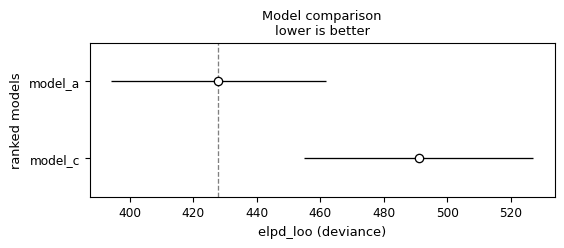

         rank   elpd_waic    p_waic  elpd_diff    weight         se  \
model_a     0  427.832915  6.147459   0.000000  0.999925  34.546412   
model_c     1  490.998237  4.296206  63.165322  0.000075  36.962224   

               dse  warning     scale  
model_a   0.000000    False  deviance  
model_c  15.807742    False  deviance  


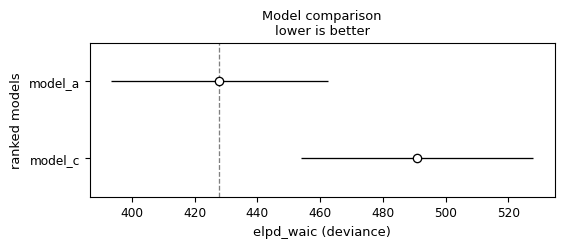

In [13]:
cmp_df = az.compare({'model_a':trace_a, 'model_c':trace_c}, method='BB-pseudo-BMA', ic="loo", scale="deviance")

print(cmp_df)

az.plot_compare(cmp_df)
plt.show()

cmp_df = az.compare({'model_a':trace_a, 'model_c':trace_c}, method='BB-pseudo-BMA', ic="waic", scale="deviance")

print(cmp_df)

az.plot_compare(cmp_df)
plt.show()

##  cel cu val mai mica este modelul cel mai bun. in cazul nostru: modelul a
##  avand mai multe date cu care sa lucreze, a obtinut rezultate mai bune
##  si waic si loo ajung la aceeasi concluzie (grafice identice)



2)

a)

In [ ]:
import seaborn as sns

iris = pd.read_csv('./iris.csv')
